                                            Weather Anomaly Detection Project

This is the project of the Weather Anomaly Detection where the anomalies are found in the relations of the weather columns. 
Basically, it helps in predicting the anomalies of the weather reports of the dataset given. 

Like, the previous analysis, we will be using the Anomaly detection ml models including the: 

1. isolation Forest 
2. Local Outlier Factor 
3. Robust Covariance  

In [3]:
# importing the libraries 
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [4]:
df = pd.read_csv("weather.csv") 
df  

,timestamp,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
0,2016-01-01 00:00:00,Panther,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
1,2016-01-01 01:00:00,Panther,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2,2016-01-01 02:00:00,Panther,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
3,2016-01-01 03:00:00,Panther,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
4,2016-01-01 04:00:00,Panther,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5
...,...,...,...,...,...,...,...,...,...,...
331161,2017-12-31 19:00:00,Mouse,8.5,NaN,4.8,NaN,NaN,992.3,210.0,8.2
331162,2017-12-31 20:00:00,Mouse,8.5,NaN,4.5,NaN,NaN,992.1,210.0,7.2
331163,2017-12-31 21:00:00,Mouse,8.2,NaN,4.0,NaN,NaN,992.1,230.0,10.3
331164,2017-12-31 22:00:00,Mouse,7.5,NaN,4.3,NaN,NaN,993.7,260.0,12.9


Now, we will be selecting the important features among the whole dataset.  The main important features include the: 

1. airTemperature 
2. cloud Coverage 
3. seaLvlPressure 
4. windDirection 
5. windSpeed 

In [5]:
features = ['airTemperature', 'cloudCoverage', 'seaLvlPressure', 'windDirection', 'windSpeed'] 
data = df[features] 

data   

,airTemperature,cloudCoverage,seaLvlPressure,windDirection,windSpeed
0,19.4,NaN,NaN,0.0,0.0
1,21.1,6.0,1019.4,0.0,0.0
2,21.1,NaN,1018.8,210.0,1.5
3,20.6,NaN,1018.1,0.0,0.0
4,21.1,NaN,1019.0,290.0,1.5
...,...,...,...,...,...
331161,8.5,NaN,992.3,210.0,8.2
331162,8.5,NaN,992.1,210.0,7.2
331163,8.2,NaN,992.1,230.0,10.3
331164,7.5,NaN,993.7,260.0,12.9


In the above data, we can see that the data gets printed in the format where we will be operating on the necessary features to make the predictions. 

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331166 entries, 0 to 331165
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   airTemperature  331038 non-null  float64
 1   cloudCoverage   160179 non-null  float64
 2   seaLvlPressure  309542 non-null  float64
 3   windDirection   318161 non-null  float64
 4   windSpeed       330592 non-null  float64
dtypes: float64(5)
memory usage: 12.6 MB


In [7]:
data.describe() 

,airTemperature,cloudCoverage,seaLvlPressure,windDirection,windSpeed
count,331038.000000,160179.000000,309542.000000,318161.000000,330592.000000
mean,14.235343,1.920907,1016.063498,184.391299,3.569554
std,9.990392,2.550744,8.052463,111.571354,2.335197
min,-28.900000,0.000000,968.200000,0.000000,0.000000
25%,7.800000,0.000000,1011.600000,90.000000,2.100000
50%,14.400000,0.000000,1016.200000,200.000000,3.100000
75%,21.100000,4.000000,1020.900000,280.000000,5.000000
max,48.300000,9.000000,1050.100000,360.000000,24.200000


In [8]:
data.shape 

(331166, 5)

In [9]:
for col in data:
    print(col) 

airTemperature
cloudCoverage
seaLvlPressure
windDirection
windSpeed


In [10]:
# finding the missing values in the whole dataset as: 

data.isnull().sum() 

airTemperature       128
cloudCoverage     170987
seaLvlPressure     21624
windDirection      13005
windSpeed            574
dtype: int64

Now, we need to remove the missing values in the data, and we will be using the fillna feature. 

In [11]:
data = data.fillna(data.mean()) 
data

,airTemperature,cloudCoverage,seaLvlPressure,windDirection,windSpeed
0,19.4,1.920907,1016.063498,0.0,0.0
1,21.1,6.000000,1019.400000,0.0,0.0
2,21.1,1.920907,1018.800000,210.0,1.5
3,20.6,1.920907,1018.100000,0.0,0.0
4,21.1,1.920907,1019.000000,290.0,1.5
...,...,...,...,...,...
331161,8.5,1.920907,992.300000,210.0,8.2
331162,8.5,1.920907,992.100000,210.0,7.2
331163,8.2,1.920907,992.100000,230.0,10.3
331164,7.5,1.920907,993.700000,260.0,12.9


Now, we will be performing the Standard Scaling on the data for thr further pre processing. 

In [12]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 

scaled_data = sc.fit_transform(data) 

Now, we will start training the models on the ML Anamoly Algorithms which will take place as: 

In [13]:
from sklearn.ensemble import IsolationForest  

iso = IsolationForest(contamination = 0.05, random_state = 42)  
iso 

,n_estimators,100
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [14]:
data['IF_Anomaly'] = iso.fit_predict(scaled_data) 

data['IF_Anomaly'] = data['IF_Anomaly'].map({1 : 0, -1 : 1}) 

data['IF_Anomaly'] 

0         0
1         1
2         0
3         0
4         0
         ..
331161    0
331162    0
331163    1
331164    1
331165    0
Name: IF_Anomaly, Length: 331166, dtype: int64

In [15]:
# Noow, we will ne importing the Local outlier Factor as: 

from sklearn.neighbors import LocalOutlierFactor  

lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.02)  

lof 

,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.02
,novelty,False
,n_jobs,None


In [16]:
data['LOF_Anomaly'] = lof.fit_predict(scaled_data) 

data['LOF_Anomaly'] = data['LOF_Anomaly'].map({1 : 0, -1:1}) 

data['LOF_Anomaly']  

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


0         0
1         0
2         0
3         0
4         0
         ..
331161    0
331162    0
331163    0
331164    0
331165    0
Name: LOF_Anomaly, Length: 331166, dtype: int64

In [17]:
from sklearn.covariance import EllipticEnvelope  

rc = EllipticEnvelope(contamination = 0.05, random_state = 42) 

rc 

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.05
,random_state,42


In [18]:
data['RC_Anomaly'] = rc.fit_predict(scaled_data) 

data['RC_Anomaly'] = data['RC_Anomaly'].map({1 : 0, -1:1}) 

data['RC_Anomaly']

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.508102090840358 > -136.824992128129395). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.508102090840358 > -136.824992128129395). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.508161693683995 > -136.825489153594191). You may want to tr

0         0
1         0
2         0
3         0
4         0
         ..
331161    0
331162    0
331163    0
331164    1
331165    0
Name: RC_Anomaly, Length: 331166, dtype: int64

In [19]:
print("Isolation Forest Anomalies: ", data['IF_Anomaly'].sum()) 
print("LOF Anomalies: ", data['LOF_Anomaly'].sum()) 
print("RC Anomalies: ", data['RC_Anomaly'].sum()) 

Isolation Forest Anomalies:  16559
LOF Anomalies:  6623
RC Anomalies:  16559


# Plotting Visualizations  

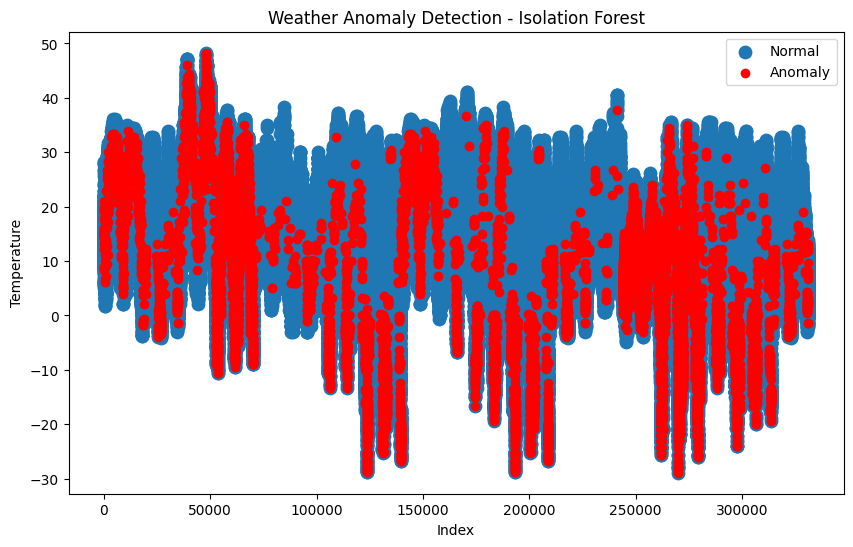

In [20]:
plt.figure(figsize = (10,6)) 

plt.scatter(data.index, data['airTemperature'], label ='Normal', s = 80) 

anomalies = data[data['IF_Anomaly']  == 1] 

plt.scatter(anomalies.index, anomalies['airTemperature'], color = 'red', label = 'Anomaly') 

plt.title("Weather Anomaly Detection - Isolation Forest")
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [21]:
# now, we can convert the above code to function, so that we can just reuse it and plot labels 

def plot_anomalies(data, feature_col, anomaly_col, title = "Anomaly Detection"): 

    plt.figure(figsize = (10,6)) 

    plt.scatter(data.index, data[feature_col], label = "Normal", s=20)  

    anomalies = data[data[anomaly_col] == 1] 

    plt.scatter(anomalies.index, anomalies[feature_col], color = 'red', label  = 'Anomaly') 

    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel(feature_col)
    plt.legend()
    plt.show() 

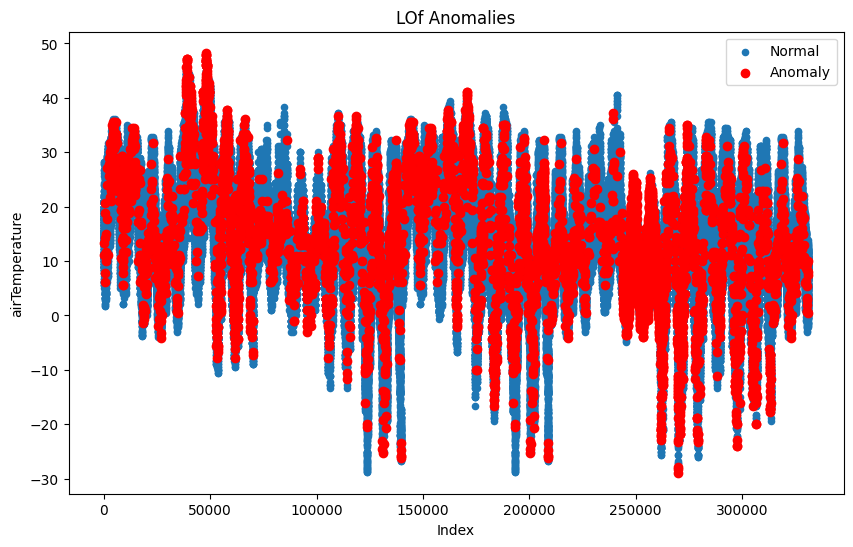

In [22]:
plot_anomalies(data, "airTemperature", "LOF_Anomaly", "LOf Anomalies") 

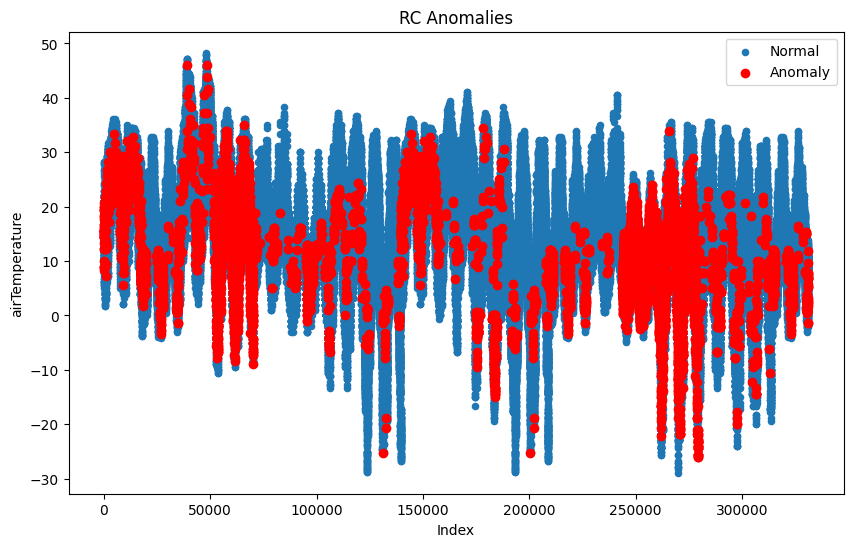

In [23]:
plot_anomalies(data, "airTemperature", "RC_Anomaly", "RC Anomalies") 

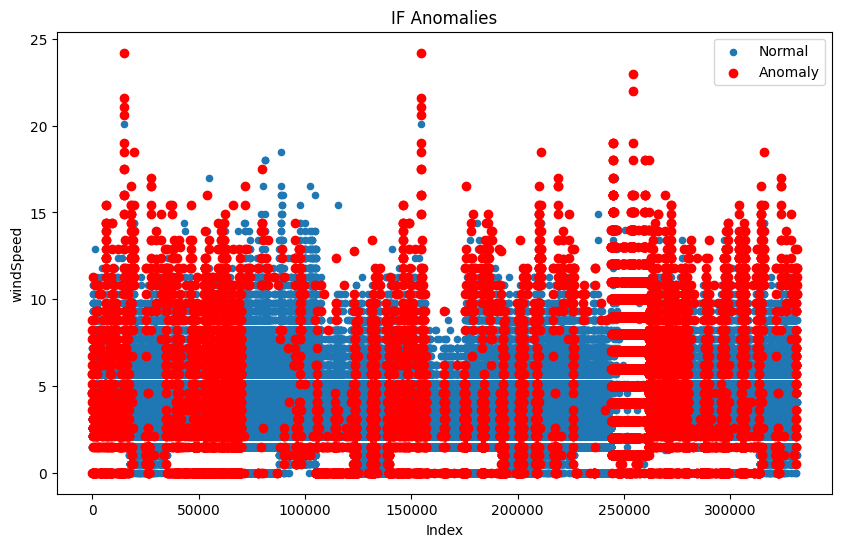

In [24]:
plot_anomalies(data, "windSpeed", "IF_Anomaly", "IF Anomalies") 

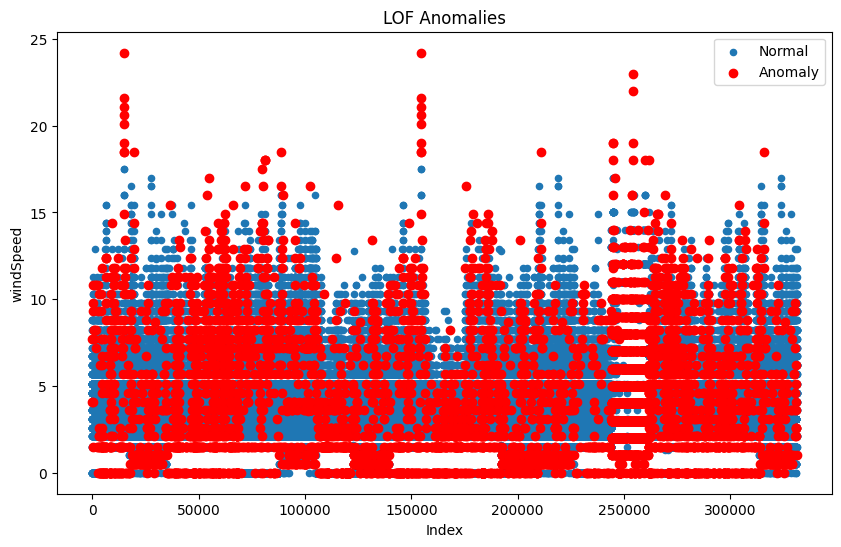

In [25]:
plot_anomalies(data, "windSpeed", "LOF_Anomaly", "LOF Anomalies") 

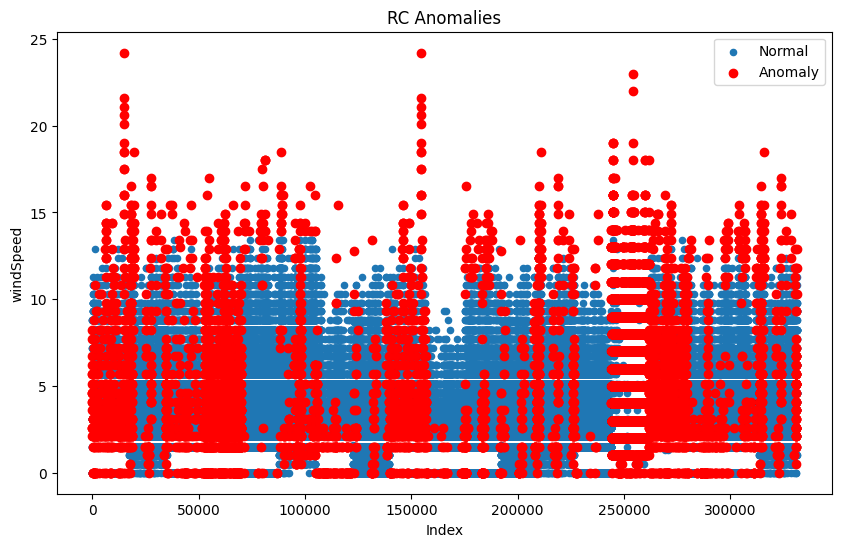

In [26]:
plot_anomalies(data, "windSpeed", "RC_Anomaly", "RC Anomalies") 

# Saving the results 

In [27]:
df = data[['IF_Anomaly', 'LOF_Anomaly', 'RC_Anomaly']] 

df 

,IF_Anomaly,LOF_Anomaly,RC_Anomaly
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
331161,0,0,0
331162,0,0,0
331163,1,0,0
331164,1,0,1


In [28]:
df.to_csv("Anomalies_Combined.csv",index = False)  

print("Result saved successfully") 

Result saved successfully
